In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image

#
# Open the video

In [20]:
# path with the video
VIDEO = './data/Rua.mp4'

# get the video
cap = cv2.VideoCapture(VIDEO)

# give an id for each frame
frames_ids = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=75)

#
# Visualizing frames

The method ```cap.read()``` returns a tuple with a **boolean** value and an **np.array**. The **np.array** is an image matrix, that is a frame of the video. Everytime that the method ```cap.read()``` is called, it returns the next frame of the video, just like the method ```___next___```. 

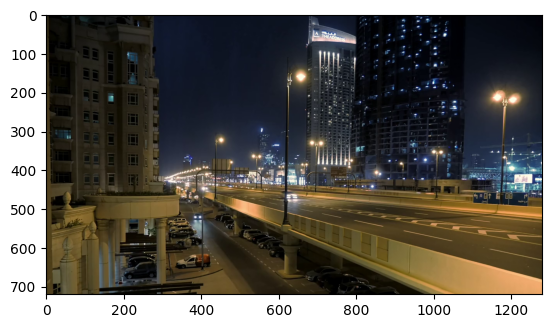

In [13]:
# takes the frames
has_frame, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# plot the frame
plt.imshow(frame)
plt.show()

#
# Median frame
The mainly idea a **median frame** is to represent the general information of a set of frames. On this case, the median frame will get the pixels more present in all video. It will be used to recognize all the new frames that is not in medianframe and consider it as an external object.

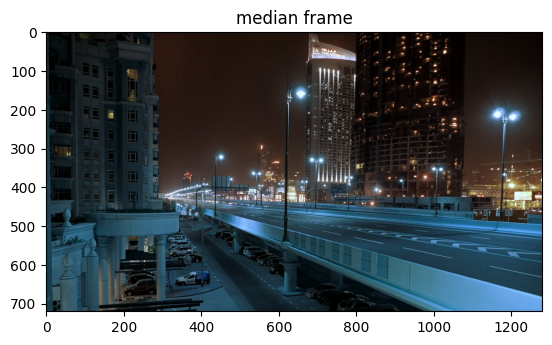

In [14]:
frames = []

# loop that creates the median frame
for id in frames_ids:
    # defines the initial position of video to the id frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, id)

    # get the next frame
    has_frame, frame = cap.read()

    # save the frame
    frames.append(frame)

# creates the median frame
median_frame = np.median(frames, axis=0).astype(np.uint8)


# plot the median frame
plt.imshow(median_frame)
plt.title('median frame')
plt.show()

#
# Turn the video into gray scale

In [15]:
# defines that de video will start from the frame 0
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# turn the median frame into gray scale
gray_median_frame = cv2.cvtColor(median_frame, cv2.COLOR_BGR2GRAY)

# saves the gray median frame
cv2.imwrite('gray_median_frame.jpg', gray_median_frame)

True

#
# Difference frames

The method ```cv2.absdiff()``` is used to calculate de absolute difference with two frames. In this case, it removes the background and let only the frames that is not part of median frame, in other words the cars.

In [27]:
dif_frames = []

# iter through each frame
cap = cv2.VideoCapture(VIDEO)
while True:
    # get the frame
    has_frame, frame = cap.read()

    # break if has no frames
    if not has_frame:
        break

    # turn into gray
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # take the difference frame
    dif_frame = cv2.absdiff(gray_frame, gray_median_frame)

    # show the difference frames
    cv2.imshow('frame', dif_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# exit the video
cv2.destroyAllWindows()

#
# Apply filter in the difference frame

In [32]:
dif_frames = []

# iter through the frames
cap = cv2.VideoCapture(VIDEO)
while True:
    # get the frame
    has_frame, frame = cap.read()

    # break if has no frames
    if not has_frame:
        break

    # turn into gray
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # take the difference frame
    dif_frame = cv2.absdiff(gray_frame, gray_median_frame)

    # apply a binary filter
    _, dif_frame = cv2.threshold(dif_frame, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # show the results
    cv2.imshow('frame', dif_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# exit the video
cv2.destroyAllWindows()